# **<span style = "color:#4b8bbe">Bone Break Classifier</span>**

### Part 1 - Building the CNN Model.

In [68]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf



from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

In [153]:
import numpy as py
from matplotlib import pyplot as plt

In [69]:
batch_size = 64
base_dir = 'data'

In [70]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

In [71]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Images',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Avulsion fracture','Comminuted fracture','Compression-Crush fracture','Fracture Dislocation',
                  'Greenstick fracture','Hairline Fracture','Impacted fracture','Intra-articular fracture',
                  'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 1702 images belonging to 12 classes.


In [76]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(12, activation='softmax')
])

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 64)      

### Optimizing the Model

In [78]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 30

In [79]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)


C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_9848\591113773.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
 2/26 [=>............................] - ETA: 50s - loss: 2.5077 - acc: 0.0703 

C:\Users\ADITHYA\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 59s 2s/step - loss: 2.4820 - acc: 0.1129
Epoch 2/30
26/26 [==============================] - 56s 2s/step - loss: 2.4480 - acc: 0.1294
Epoch 3/30
26/26 [==============================] - 53s 2s/step - loss: 2.4008 - acc: 0.1636
Epoch 4/30
26/26 [==============================] - 64s 2s/step - loss: 2.3465 - acc: 0.1777
Epoch 5/30
26/26 [==============================] - 80s 3s/step - loss: 2.2562 - acc: 0.2265
Epoch 6/30
26/26 [==============================] - 74s 3s/step - loss: 2.1331 - acc: 0.2845
Epoch 7/30
26/26 [==============================] - 67s 3s/step - loss: 1.9950 - acc: 0.3297
Epoch 8/30
26/26 [==============================] - 61s 2s/step - loss: 1.8365 - acc: 0.3864
Epoch 9/30
26/26 [==============================] - 62s 2s/step - loss: 1.6797 - acc: 0.4426
Epoch 10/30
26/26 [==============================] - 63s 2s/step - loss: 1.4990 - acc: 0.5006
Epoch 11/30
26/26 [==============================] - 67s 3s/step - loss: 1.3593 

In [80]:
model.save('model.h5')

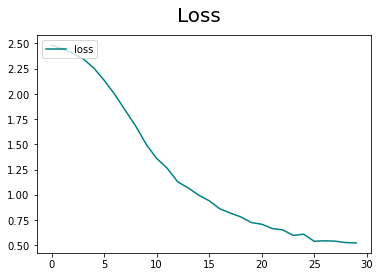

In [155]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

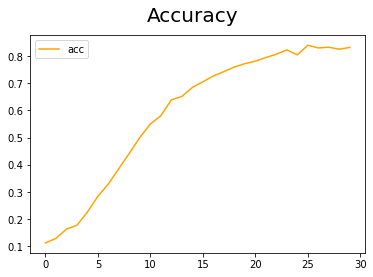

In [158]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['acc'], color='orange',label='acc')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Predicting the Model on Test data.

In [81]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [82]:
test_image = image.load_img('1b62e6fbfbc5a2f70c6af413189cfc82.jpg', target_size = (200,200))

In [86]:
test_image = image.load_img('9d79b527cca86a56fa24c88017e6bbd4--x-rays-physiology.jpg', target_size = (200,200))

In [90]:
test_image = image.load_img('38890tn.jpg', target_size = (200,200))


In [98]:
test_image = image.load_img('images29.jpg', target_size = (200,200))


In [114]:
file_name = ['image2.jpeg',
'image12.jpeg',
'image30.jpeg',
'image31.jpeg',
'image13.jpeg',
'x-ray-of-fracture-tibia.jpg',
'image9.jpeg',
'leg-xray.jpg']


In [145]:
test_image = image.load_img(file_name[7], target_size = (200,200))


In [146]:
test_image = np.expand_dims(test_image, axis=0)

In [147]:
result = model.predict(test_image)

1/1 [==============================] - 0s 33ms/step


In [148]:
result

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.3402615e-13]],
      dtype=float32)

In [149]:
if result[0][0] == 1:
    print("Avulsion Fracture")
elif result[0][1] == 1:
    print("Comminuted fracture")
elif result[0][2] == 1:
    print("Compression-Crush fracture")
elif result[0][3] == 1:
    print("Fracture Dislocation")
elif result[0][4] == 1:
    print("Greenstick fracture")
elif result[0][5] == 1:
    print("Hairline fracture")
elif result[0][6] == 1:
    print("Impacted Dislocation")
elif result[0][7] == 1:
    print("Intra-articluar fracture")
elif result[0][8] == 1:
    print("Longitudinal fracture")
elif result[0][9] == 1:
    print("Oblique Dislocation")
elif result[0][10] == 1:
    print("Pathological fracture")
elif result[0][11] == 1:
    print("Spiral fracture")
else:
    print("Unknown")


Intra-articluar fracture


## Conclusion
### Our model is Performing well with an accuracy rate of 83% .
### We can further improve the model's performance by using RNN,BERT algorithm etc..